In [1]:
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
#from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_price.pkl'.format(os.environ['HOME'])
df_DUID_CO2_price = pd.read_pickle(file_path)
print(df_DUID_CO2_price.shape)
df_DUID_CO2_price.head()

(911171, 3)


,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-07-31 23:55:00,70.70204,0.910143,0.89508
2018-07-31 23:50:00,69.24109,0.728114,0.59672
2018-07-31 23:45:00,69.94850,0.910143,0.89508
2018-07-31 23:40:00,74.04497,0.908305,0.89508
2018-07-31 23:35:00,76.44245,0.971761,0.89508


In [3]:
df_DUID_CO2_price2 = df_DUID_CO2_price[(df_DUID_CO2_price.index > dt.datetime(2018,5,15)) &
                                       (df_DUID_CO2_price.index < dt.datetime(2018,6,1))]
df_DUID_CO2_price2.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-05-31 23:55:00,72.54360,0.605537,0.59672
2018-05-31 23:50:00,70.32848,0.912643,0.89508
2018-05-31 23:45:00,72.52576,0.908518,0.89508
2018-05-31 23:40:00,82.87810,0.608429,0.59672
2018-05-31 23:35:00,135.00004,0.694855,0.59672


In [4]:
df_DUID_CO2_price2.index

DatetimeIndex(['2018-05-31 23:55:00', '2018-05-31 23:50:00',
               '2018-05-31 23:45:00', '2018-05-31 23:40:00',
               '2018-05-31 23:35:00', '2018-05-31 23:30:00',
               '2018-05-31 23:25:00', '2018-05-31 23:20:00',
               '2018-05-31 23:15:00', '2018-05-31 23:10:00',
               ...
               '2018-05-15 00:50:00', '2018-05-15 00:45:00',
               '2018-05-15 00:40:00', '2018-05-15 00:35:00',
               '2018-05-15 00:30:00', '2018-05-15 00:25:00',
               '2018-05-15 00:20:00', '2018-05-15 00:15:00',
               '2018-05-15 00:10:00', '2018-05-15 00:05:00'],
              dtype='datetime64[ns]', name='PeriodID', length=4858, freq=None)

In [5]:
print(df_DUID_CO2_price2.index.min())
print(df_DUID_CO2_price2.index.max())

2018-05-15 00:05:00
2018-05-31 23:55:00


In [6]:
df_DUID_CO2_price3 = df_DUID_CO2_price[(df_DUID_CO2_price.index > dt.datetime(2018,5,1)) &
                                       (df_DUID_CO2_price.index < dt.datetime(2018,6,1))]
df_DUID_CO2_price3.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-05-31 23:55:00,72.54360,0.605537,0.59672
2018-05-31 23:50:00,70.32848,0.912643,0.89508
2018-05-31 23:45:00,72.52576,0.908518,0.89508
2018-05-31 23:40:00,82.87810,0.608429,0.59672
2018-05-31 23:35:00,135.00004,0.694855,0.59672


In [7]:
group_minute = df_DUID_CO2_price3.groupby(df_DUID_CO2_price3.index.minute).mean()
group_hour = df_DUID_CO2_price3.groupby(df_DUID_CO2_price3.index.hour).mean()
group_day = df_DUID_CO2_price3.groupby(df_DUID_CO2_price3.index.day).mean()
group_week = df_DUID_CO2_price3.groupby(df_DUID_CO2_price3.index.week).mean()

In [8]:
time_periods = {"week":group_week, "day":group_day, "hour":group_hour, "minute":group_minute}

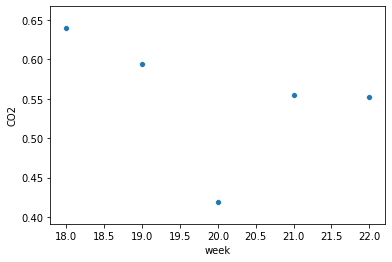

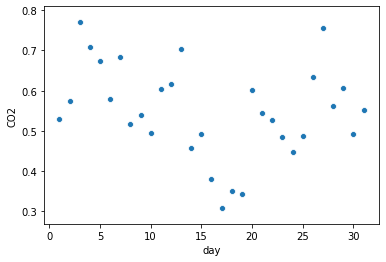

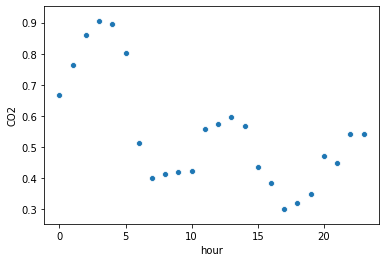

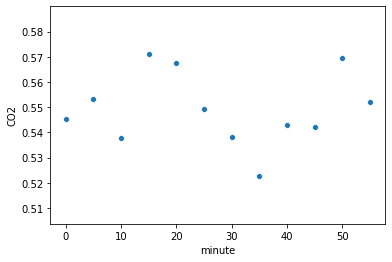

<Figure size 432x288 with 0 Axes>

In [65]:
for i in time_periods:
    fig = sns.scatterplot(time_periods[i].index, time_periods[i].CO2E_EMISSIONS_FACTOR)
    fig.set(xlabel = i, ylabel = "CO2")
    plt.figure()

In [51]:
print(df_DUID_CO2_price3.index.min())
print(df_DUID_CO2_price3.index.max())

2018-05-30 00:05:00
2018-05-31 23:55:00


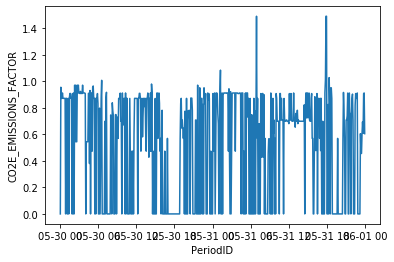

In [50]:
fig = sns.lineplot(df_DUID_CO2_price3.index, df_DUID_CO2_price3.CO2E_EMISSIONS_FACTOR);

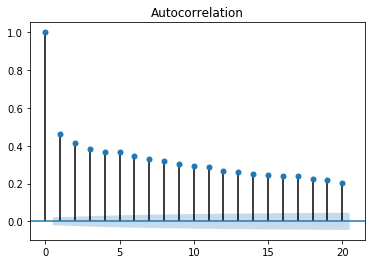

In [11]:
plot_acf(df_DUID_CO2_price3.CO2E_EMISSIONS_FACTOR, lags=20);

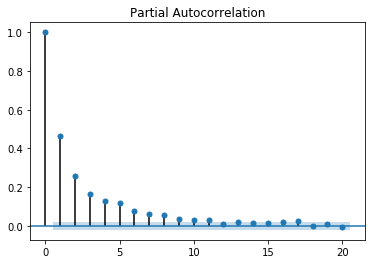

In [12]:
plot_pacf(df_DUID_CO2_price3.CO2E_EMISSIONS_FACTOR, lags=20);

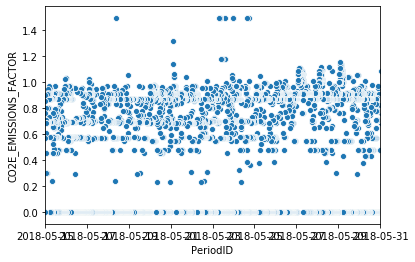

In [48]:
fig = sns.scatterplot(df_DUID_CO2_price3.index, df_DUID_CO2_price3.CO2E_EMISSIONS_FACTOR)
fig.set_xlim(dt.date(2018,5,15), dt.date(2018,5,31));